Auteur: Pablo Di Muzio

Répo Github: github.com/pablodimuzio/M303-TP3

# Important !
Je me rend compte à 22h58 le jour du rendu que les pages HTML générées par jupyter sur mon ordinateur ne rendent pas le LaTex. Je me suis donc permis de joindre à mon rendu initial les fichiers aux formats PDF et Jupyter.
Bonne correction !

In [1]:
%display latex

import math
from sage.manifolds.operators import *

# TP N°3: Opérateurs différentiels de la physique
## Exercice 1:
### Question 1:
$$ \text{div} E = \dfrac{\partial E_1}{\partial x} + \dfrac{\partial E_2}{\partial x} $$

In [2]:
x,y = var('x','y')

v(x,y) = (-y, x)

In [3]:
v.div()

(x, y) |--> 0

On a donc une divergence nulle pour E.

### Question 2:
On souhaite calculer le flot $t \rightarrow \phi_t (x_0, y_0)$ par la méthode d'Euler.

In [4]:
def flot(x,y, T):
    
        h = T*0.01
        p = (x,y)
    
    
        for k in range(floor(T/h)):
            temp1 = p[0] + h*v(p[0], p[1])[0]
            temp2 = p[1] + h*v(p[0], p[1])[1]
            p = (temp1, temp2)
        return(p)
flot(2,0, 1)

(1.08607726866470, 1.69134112906336)

On utilise une fonction qui permet de calculer le flot en chaque points de $f$ pour un $T$ donné. 

### Question 3:
Représenter les points
$$
    \left(  2+ \dfrac{i}{4m}\cos\dfrac{2\pi j}{m},\dfrac{i}{4m}\cos\dfrac{2\pi j}{m} \right)
$$
pour $m \in \{5,10,20\}$

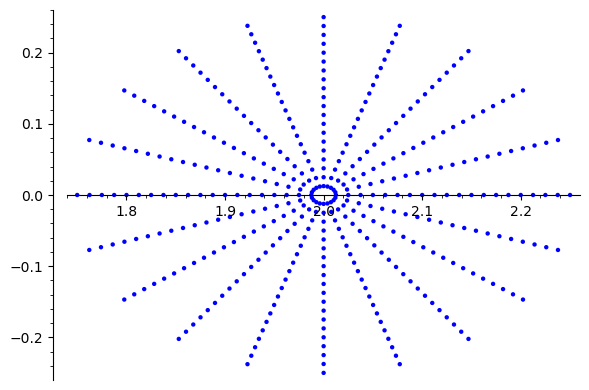

In [5]:
def points(m):
    return lambda i,j: (2+i/(4*m)*cos(2*pi*j/m), i/(4*m)*sin(2*pi*j/m))


m=20
f(x,y) = points(m)(x,y)
liste_points = []
    
for i in range(1,m+1):
    for j in range(1, m+1):
        liste_points.append(f(i,j))
list_plot(liste_points)

On voit un motif apparaitre dans le plan. On pourra remarquer ses déformations et ses translations comme référence pour les différents champs vectoriels.

### Question 4:
On applique donc à notre motif le "flot" de notre champ vectoriel $E_1$ et on regarde l'évolution du graphique en faisant varier $T$ 

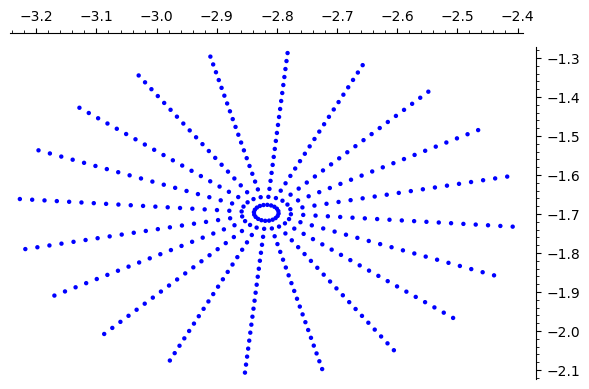

In [6]:
liste_flot = []
for k in range(len(liste_points)):
    liste_flot.append(flot(N(liste_points[k][0]), N(liste_points[k][1]), 10))
list_plot(liste_flot)

On remarque que le nuage de point se translate diagonalement sans être affecter en échelle.

## Exercice 2:
### Question 1:

In [7]:
x,y = var('x','y')

v(x,y) = (-x**2+y**2, -2*x*y)

In [8]:
v.div()

(x, y) |--> -4*x

In [9]:
def flot(x,y, T):
    
        h = T*0.01
        p = (x,y)
    
    
        for k in range(floor(T/h)):
            temp1 = p[0] + h*v(p[0], p[1])[0]
            temp2 = p[1] + h*v(p[0], p[1])[1]
            p = (temp1, temp2)
        return(p)
flot(2,0, 1)

(0.661757237548735, 0)

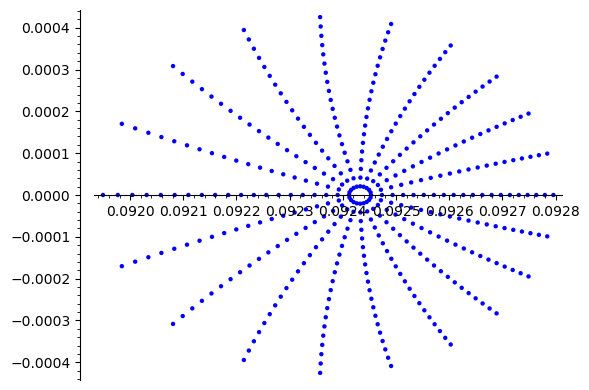

In [10]:
def points(m):
    return lambda i,j: (2+i/(4*m)*cos(2*pi*j/m), i/(4*m)*sin(2*pi*j/m))


m=20
f(x,y) = points(m)(x,y)
liste_points = []
    
for i in range(1,m+1):
    for j in range(1, m+1):
        liste_points.append(flot(N(f(i,j)[0]), N(f(i,j)[1]), 10))

list_plot(liste_points)

Le motif est réduit de façon inversement proportionel à la distance à la droite $(0,y)$

### Question 2:

In [11]:
x,y = var('x','y')

v(x,y) = (x/5, y/5)

In [12]:
v.div()

(x, y) |--> 2/5

In [13]:
def flot(x,y, T):
    
        h = T*0.01
        p = (x,y)
    
    
        for k in range(floor(100)):
            temp1 = p[0] + h*v(p[0], p[1])[0]
            temp2 = p[1] + h*v(p[0], p[1])[1]
            p = (temp1, temp2)
        return(p)
flot(2,0, 10)

(14.4892922365047, 0)

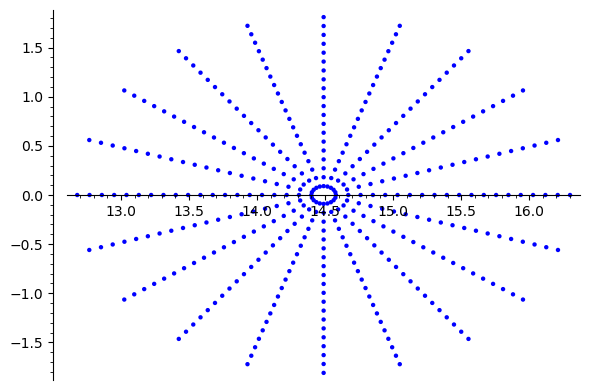

In [14]:
def points(m):
    return lambda i,j: (2+i/(4*m)*cos(2*pi*j/m), i/(4*m)*sin(2*pi*j/m))


m=20
f(x,y) = points(m)(x,y)
liste_points = []
    
for i in range(1,m+1):
    for j in range(1, m+1):
        liste_points.append(flot(N(f(i,j)[0]), N(f(i,j)[1]), 10))

list_plot(liste_points)

On a ici un enflement du motif dans le plan.

## Exercice 3:
### Question 1:

On cherche à tracer la droite paramétrique 
$$
f: (x,y) \rightarrow \left(\cos\theta\left(1+\cos\theta\right), \sin\theta\left(1+\cos\theta\right)\right)
$$

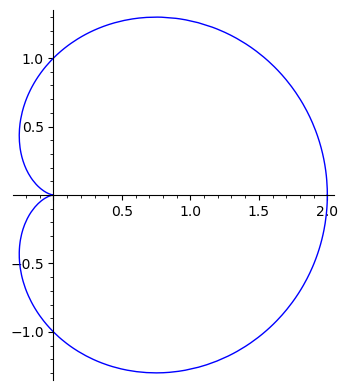

In [15]:
theta = var('theta')
f(theta) = (cos(theta)*(1+cos(theta)), sin(theta)*(1+cos(theta)))

parametric_plot(f, (theta, 0, 2*pi))

### Question 2:
On veut maintenant tracer la tangente à la courbe pour $a \in \left\{ 0, \dfrac{\pi}{3}, \dfrac{\pi}{2}, \dfrac{2\pi}{3}, \pi,\dfrac{3\pi}{2}, 2\pi \right\}$.
On sait que le vecteur tangent aura pour origine le point $f(a)$ et d'arriver le point $f(a)$ par la translation $f'(a)$

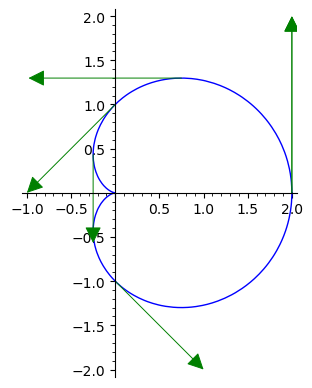

In [16]:
P = parametric_plot(f, (theta, 0, 2*pi))
for a in [0, pi/3, pi/2, 2*pi/3, pi, 3*pi/2, 2*pi]:
    P += arrow(f(a), (f(a)[0]+derivative(f)(a)[0][0], f(a)[1]+derivative(f)(a)[1][0]), color='green', width='0.7')
show(P)

### Question 3:
On veut maintenant la normale aux points $a \in \left\{ 0, \dfrac{\pi}{3}, \dfrac{\pi}{2}, \dfrac{2\pi}{3}, \pi,\dfrac{3\pi}{2}, 2\pi \right\}$. On sait que le vecteur tangent et qui pointe vers l'exterieur de la courbe est le vecteur d'origine $f(a)$ et d'arrivée $f(a)$ translaté par le vecteur $\left( \dfrac{\partial f}{\partial y}, -\dfrac{\partial f}{\partial x}\right)$

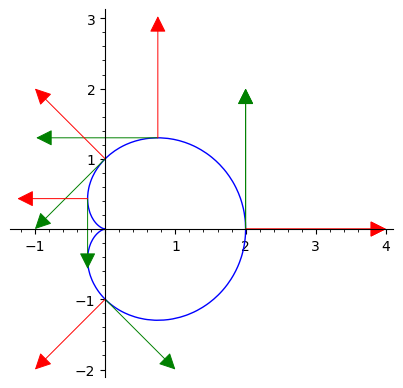

In [17]:
P = parametric_plot(f, (theta, 0, 2*pi))
for a in [0, pi/3, pi/2, 2*pi/3, pi, 3*pi/2, 2*pi]:
    P += arrow(f(a), (f(a)[0]+derivative(f)(a)[0][0], f(a)[1]+derivative(f)(a)[1][0]), color='green', width='0.7')
    P += arrow(f(a), (f(a)[0]+derivative(f)(a)[1][0], f(a)[1]-derivative(f)(a)[0][0]), color='red', width='0.7')
show(P)

On a un problème à $\theta = \pi$ puisque la tangente n'existe pas, le vecteur normal ne peut pas non plus exister.
### Question 4:
On utilise l'approximation par la méthode de Monte Carlo sur la formule 
$$
l(f) = \int_0^{2\pi} ||f'(x)|| d\theta
$$

In [18]:
monte_carlo_integral(sqrt(derivative(f)[0][0]**2 + derivative(f)[1][0]**2), [0], [2*pi], 10000000)

(8.000433259849041, 0.001222754964622594)

On estime donc la longueur de la courbe à $8.000 \pm 10^{-3}$

### Question 5:
On veut calculer la circulation le long de la courbe, on applique le cours.

In [19]:
v(x,y) = (x,y)

integrate(v(f[0], f[1])*derivative(f),theta, 0, 2*pi)

(0)

On voit que la circulation est nulle le long de $f$. Cela semble très logique puisque $f(2\pi) = f(0)$  et que $\text{div }v$ est constante
### Question 6:
On veut calculer la surface inscrite dans le cardioïde, on utilise la définition du cours.

In [20]:
integrate(f[0]/2*derivative(f)[1][0]-f[1]/2*derivative(f)[0][0],theta, 0, 2*pi)

3/2*pi

On a donc l'aire du cardioïde décrit par $f$ égale à $\dfrac{3}{2}\pi$